# IDENTITAS KELOMPOK 

- AHMAD RAFIF ALAUDIN | 2041720230

- ATMAYANTI | 2041720016

- ROSILATANSA SALSABELA | 2041720026

KELAS TI 3G


# Menyiapkan Dataset

In [26]:
# import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [4]:
# connect drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# import dataset

df = pd.read_csv('/content/drive/MyDrive/KULIAH/- SEMESTER 5 -/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
# detail dataset
df.shape

(2200, 8)

In [7]:
# jenis label pada dataset
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
# tipe data tiap kolom dataset
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [9]:
# jumlah data tiap label
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

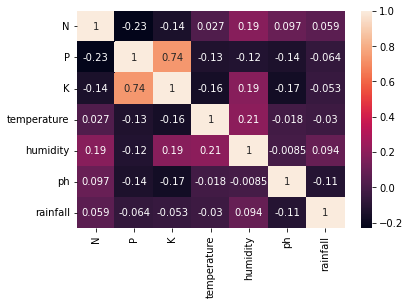

In [10]:
# visualisasi data menggunakan heatmap
sns.heatmap(df.corr(),annot=True)

## memisahkan dan split dataset

In [11]:
# pisahkan variabel x (features) dan variabel y (target & label)

features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [12]:
# buat array untuk menyimpan akurasi dan nama setiap model
acc = []
model = []

In [13]:
# Splitting data train dan test dengan perbandingan 8 : 2

Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Membuat Model

## 1. Decission Tree Entropy

In [17]:
# inisialisasi model
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

# fitting data train
DecisionTree.fit(Xtrain,Ytrain)

# testing
predicted_values = DecisionTree.predict(Xtest)

# hitung akurasi model
x = metrics.accuracy_score(Ytest, predicted_values)

# simpan akurasi model dan nama model
acc.append(x)
model.append('Decision Tree')

print("Akurasi Menggunakan Decission Tree Entropy : ", x*100)

Akurasi Menggunakan Decission Tree Entropy :  90.0


In [18]:
# melakukan data validation menggunakan cross validation :

score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

## 2. Gaussian Naive Bayes

In [23]:
#inisialisasi model
NaiveBayes = GaussianNB()

# fitting data train
NaiveBayes.fit(Xtrain,Ytrain)

# testing dengan data test
predicted_values = NaiveBayes.predict(Xtest)

# hitung akurasi model
x = metrics.accuracy_score(Ytest, predicted_values)

# simpan akurasi model dan nama model
acc.append(x)
model.append('Naive Bayes')
print("Akurasi Menggunakan Naive Bayes Gaussian: ", x*100)

Akurasi Menggunakan Naive Bayes Gaussian:  99.0909090909091


In [20]:
# melakukan data validation menggunakan cross validation :

score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

## 3. Suport Vector Machine (SVM)

In [24]:
# inisialisasi model
SVM = SVC(gamma='auto')

# fitting data train
SVM.fit(Xtrain,Ytrain)

# testing menggunakan data test
predicted_values = SVM.predict(Xtest)

# hitung akurasi model
x = metrics.accuracy_score(Ytest, predicted_values)

# simpan akurasi model dan nama model
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x*100)

SVM's Accuracy is:  10.681818181818182


In [25]:
# melakukan data validation menggunakan cross validation :

score = cross_val_score(SVM,features,target,cv=5)
score

array([0.27727273, 0.28863636, 0.29090909, 0.275     , 0.26818182])

## 4. Random Forest

In [28]:
# inisialisasi model 
RF = RandomForestClassifier(n_estimators=20, random_state=0)

# fitting data train
RF.fit(Xtrain,Ytrain)

# testing menggunakan data test
predicted_values = RF.predict(Xtest)

# hitung akurasi model
x = metrics.accuracy_score(Ytest, predicted_values)

# simpan akurasi model dan nama model
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x*100)

RF's Accuracy is:  99.0909090909091


In [29]:
# melakukan data validation menggunakan cross validation :

score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

# Evaluasi model dengan akurasi tertinggi

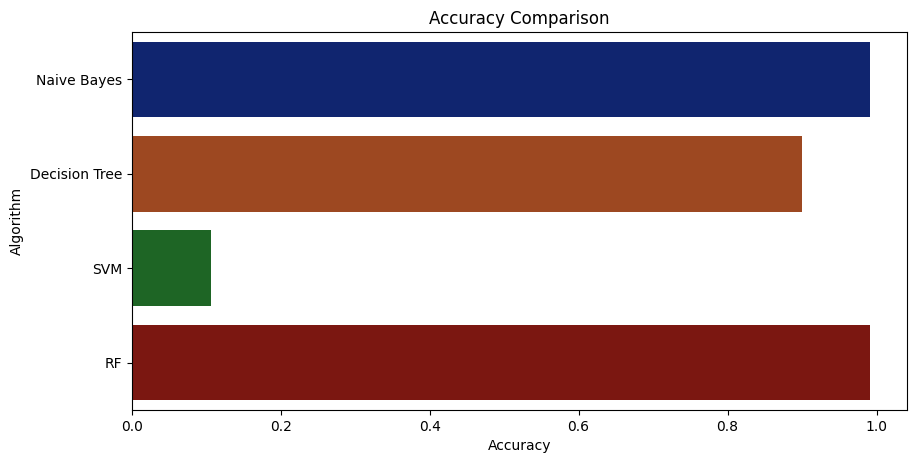

In [30]:
# visualisasi 

plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

- dari visualisasi diatas dapat disimpulkan model yang menghasilkan akurasi paling tinggi, atau model yang cocok digunakan untuk melakukan klasifikasi berdasarkan feature yang ada pada dataset adalah model RF dan Naive Bayes, karena keduanya memiliki nilai akurasi sama dan paling tinggi dari model lainnya.

- selanjutnya akan menyimpan model Naive Bayes yang sudah dilatih

# Simpan Model Naive Bayes yang sudah dilatih

In [31]:
import pickle

# membuat nama file
NB_pkl_filename = 'NBClassifier.pkl'

# buka file dan simpan sebagai ekstensi 'pkl'
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)

# tutup instans pickle
NB_Model_pkl.close()

# Terapkan Model terhadap inputan data baru untuk dapat diklasifikasikan

In [48]:
# inisialisasi array untuk menyimpan nilai inputan
list = []

# input data
ask = 'Masukkan jumlah Senyawa N : '
val = float(input(ask))
list.append(val)

ask = 'Masukkan jumlah Senyawa P : '
val = float(input(ask))
list.append(val)

ask = 'Masukkan jumlah Senyawa K : '
val = float(input(ask))
list.append(val)

ask = 'Masukkan Temperature suhu : '
val = float(input(ask))
list.append(val)

ask = 'Masukkan tingkat kelembaban : '
val = float(input(ask))
list.append(val)

ask = 'Masukkan tingkat PH tanah : '
val = float(input(ask))
list.append(val)

ask = 'Masukkan tingkat Curah Hujan : '
val = float(input(ask))
list.append(val)


# masukkan pada model yang telah dilatih
data = np.array([list])
prediction = NaiveBayes.predict(data)

print("\n\n\n Jadi berdasarkan inputan Anda, tanaman yang cocok ditanam pada lingkungan tersebut adalah : " + prediction[0] + '\n')


Masukkan jumlah Senyawa N : 88
Masukkan jumlah Senyawa P : 53
Masukkan jumlah Senyawa K : 48
Masukkan Temperature suhu : 23
Masukkan tingkat kelembaban : 82
Masukkan tingkat PH tanah : 6.5
Masukkan tingkat Curah Hujan : 230



 Jadi berdasarkan inputan Anda, tanaman yang cocok ditanam pada lingkungan tersebut adalah : rice



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
